In [112]:
import pandas as pd 
import numpy as np
import seaborn as sns

In [91]:
data=pd.read_csv('/Steel_industry_data.csv')

In [92]:
data.head(10)

,TIME,volume_of_production,downtime,Usage _Kwh,down time cause
0,Saturday 29/01/22,NaN,NaN,NaN,NaN
1,7am-8am,3080.0,0.0,3.17,NaN
2,8am-9am,2464.0,15.0,4.00,"fault dancer encoder at ocme,inverted cap hooked"
3,9am-10am,2310.0,18.0,3.24,"fault dancer encoder at ocme,blowing pressure ..."
4,10am-11am,2464.0,15.0,3.31,inverted cap hooked
5,11am-12pm,2464.0,15.0,3.82,fallen bottles at conveyor
6,12pm-1pm,3080.0,0.0,3.28,NaN
7,1pm-2pm,2772.0,9.0,3.60,inverted cap hooked
8,2pm-3pm,2772.0,9.0,3.60,work on fv tulip rubber
9,3pm-4pm,2002.0,23.0,3.28,inverted cap hooked


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TIME                  120 non-null    object 
 1   volume of production  115 non-null    float64
 2   downtime              115 non-null    float64
 3   Usage _Kwh            115 non-null    float64
 4   down time cause       98 non-null     object 
dtypes: float64(3), object(2)
memory usage: 4.8+ KB


In [ ]:
data[data['Usage _Kwh'].isnull()]

,TIME,volume of production,downtime,Usage _Kwh,down time cause
0,saturday 29/01/22,NaN,NaN,NaN,NaN
25,SUNDAY 30/1/22,NaN,NaN,NaN,NaN
50,TUESDAY 1/2/22,NaN,NaN,NaN,NaN
75,THURSDAY 3/2/22,NaN,NaN,NaN,NaN
100,FRIDAY 4/2/22,NaN,NaN,NaN,NaN


In [ ]:
data[data['downtime'].isnull()]

,TIME,volume of production,downtime,Usage _Kwh,down time cause
0,saturday 29/01/22,NaN,NaN,NaN,NaN
25,SUNDAY 30/1/22,NaN,NaN,NaN,NaN
50,TUESDAY 1/2/22,NaN,NaN,NaN,NaN
75,THURSDAY 3/2/22,NaN,NaN,NaN,NaN
100,FRIDAY 4/2/22,NaN,NaN,NaN,NaN


We need not remove null values as only rows with Date(in Coloumn A) have null cells corresponding to them.

---



In [ ]:
data.describe()

,volume of production,downtime,Usage _Kwh
count,115.000000,115.000000,115.000000
mean,2053.243478,22.052174,3.632087
std,848.106659,16.253930,0.289005
min,0.000000,0.000000,3.170000
25%,1400.000000,9.000000,3.365000
50%,2275.000000,18.000000,3.600000
75%,2772.000000,35.000000,3.850000
max,3388.000000,60.000000,4.280000


In [13]:
data.corr()

,volume of production,downtime,Usage _Kwh
volume of production,1.000000,-0.997831,-0.166642
downtime,-0.997831,1.000000,0.163615
Usage _Kwh,-0.166642,0.163615,1.000000


<ipython-input-94-230b8e0c721c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['volume_of_production'])


<Axes: xlabel='volume_of_production', ylabel='Density'>

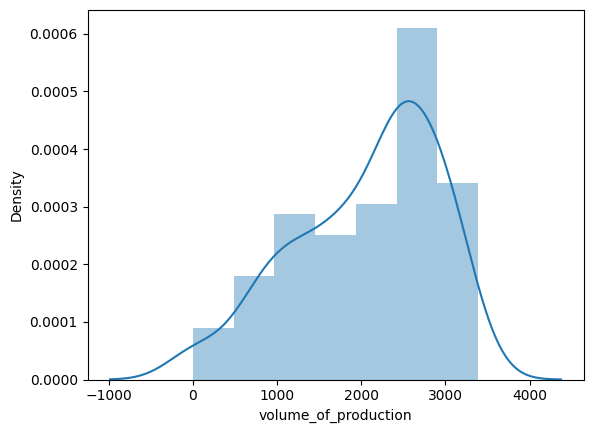

In [94]:
import seaborn as sns
sns.distplot(data['volume_of_production'])

<ipython-input-73-ad7b06b83d0f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['downtime'])


<Axes: xlabel='downtime', ylabel='Density'>

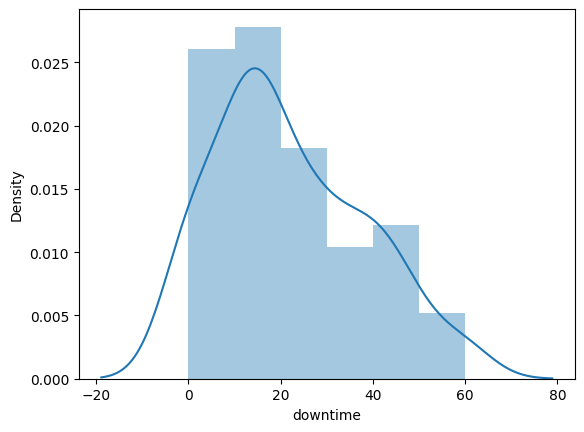

In [73]:
sns.distplot(data['downtime'])

In [78]:
import statsmodels.formula.api as smf

In [96]:
model = smf.ols("volume_of_production ~ downtime",data = data).fit()

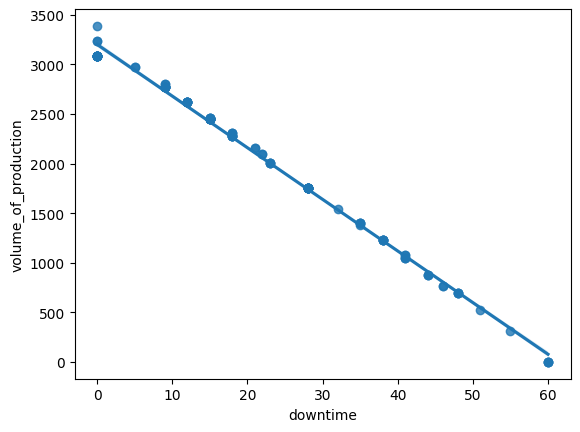

In [97]:
sns.regplot(x="downtime", y="volume_of_production", data=data);

In [98]:
model.params

Intercept    3201.398765
downtime      -52.065401
dtype: float64

In [99]:
(model.rsquared)

0.9956673347794032

In [100]:
print(model.tvalues, '/n, model.pvalues')

Intercept    362.245508
downtime    -161.145724
dtype: float64 /n, model.pvalues


In [109]:
newdata=pd.Series([1,2,58,59])

In [110]:
data_pred=pd.DataFrame(newdata,columns=['downtime'])

In [111]:
model.predict(data_pred)

0    3149.333364
1    3097.267962
2     181.605483
3     129.540082
dtype: float64